# Laptop Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading the data into pandas
laptops = pd.read_csv("laptops.csv", encoding="latin-1")
laptops

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,"400,00"
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,"2139,97"
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"1158,70"
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,"1495,00"
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,"770,00"


## Data Pre-processing

### Clean column names

In [3]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
Manufacturer                1303 non-null object
Model Name                  1303 non-null object
Category                    1303 non-null object
Screen Size                 1303 non-null object
Screen                      1303 non-null object
CPU                         1303 non-null object
RAM                         1303 non-null object
 Storage                    1303 non-null object
GPU                         1303 non-null object
Operating System            1303 non-null object
Operating System Version    1133 non-null object
Weight                      1303 non-null object
Price (Euros)               1303 non-null object
dtypes: object(13)
memory usage: 132.4+ KB


In [4]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [5]:
# This function clean a string label
def clean_label(s):
    s = s.strip();
    s = s.replace("Operating System", "os")
    s = s.replace(" ", "_")
    s = s.replace("(", "")
    s = s.replace(")", "")
    s = s.lower()
    return s

In [6]:
# Apply the clean function to each column name
new_label = [clean_label(label) for label in laptops.columns]

In [7]:
new_label

['manufacturer',
 'model_name',
 'category',
 'screen_size',
 'screen',
 'cpu',
 'ram',
 'storage',
 'gpu',
 'os',
 'os_version',
 'weight',
 'price_euros']

In [8]:
laptops.columns = new_label

In [9]:
laptops.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


### Convert RAM, Price, Weight into numerical columns (create new columns)

In [10]:
laptops.ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [11]:
# Remove the GB symbol by slicing each string not included the last two index, and then cast to type int
laptops.ram.str.slice(0, -2).astype('int')

0        8
1        8
2        8
3       16
4        8
5        4
6       16
7        8
8       16
9        8
10       4
11       4
12      16
13       4
14       8
15       8
16       8
17      16
18       8
19       8
20       2
21       8
22       4
23       8
24       8
25       4
26       8
27       8
28       8
29       8
        ..
1273     6
1274     4
1275     8
1276     6
1277     4
1278     2
1279     8
1280     6
1281     8
1282     2
1283     4
1284     4
1285    16
1286     2
1287     6
1288     4
1289     8
1290     6
1291     4
1292     2
1293     8
1294     6
1295     8
1296     2
1297     4
1298     4
1299    16
1300     2
1301     6
1302     4
Name: ram, Length: 1303, dtype: int32

In [12]:
# Clean the ram column
laptops['ram_gb'] = laptops.ram.str.slice(0, -2).astype('int')

In [13]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
manufacturer    1303 non-null object
model_name      1303 non-null object
category        1303 non-null object
screen_size     1303 non-null object
screen          1303 non-null object
cpu             1303 non-null object
ram             1303 non-null object
storage         1303 non-null object
gpu             1303 non-null object
os              1303 non-null object
os_version      1133 non-null object
weight          1303 non-null object
price_euros     1303 non-null object
ram_gb          1303 non-null int32
dtypes: int32(1), object(13)
memory usage: 137.5+ KB


In [14]:
# Clean the price_europe column
laptops["price_euros_num"] = laptops.price_euros.str.replace(",", ".").astype("float")

In [15]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
dtypes: float64(1), int32(1), object(13)
memory usage: 147.7+ KB


In [16]:
laptops.weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [17]:
laptops.weight.str.match(".*[0-9](kg)$").all()

False

In [18]:
# Observe the special case
laptops.weight[~laptops.weight.str.match(".*[0-9](kg)$")]

1061    4kgs
Name: weight, dtype: object

In [19]:
# Clean the weight column
laptops["weight_kg"] = laptops["weight"].str.replace("kg", "").str.replace("s", "").astype("float")

In [20]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
weight_kg          1303 non-null float64
dtypes: float64(2), int32(1), object(13)
memory usage: 157.9+ KB


### Extract CPU speed from CPU column

In [21]:
laptops.cpu.head(10)

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
5       AMD A9-Series 9420 3GHz
6          Intel Core i7 2.2GHz
7          Intel Core i5 1.8GHz
8    Intel Core i7 8550U 1.8GHz
9    Intel Core i5 8250U 1.6GHz
Name: cpu, dtype: object

In [22]:
# Extract CPU speed from CPU column
laptops.cpu.str.replace("GHz", "").str.extract(" ([0-9\.]*)$").astype("float")

,0
0,2.30
1,1.80
2,2.50
3,2.70
4,3.10
5,3.00
6,2.20
7,1.80
8,1.80
9,1.60


In [23]:
laptops["cpu_speed_ghz"] =  laptops.cpu.str.replace("GHz", "").str.extract(" ([0-9\.]*)$").astype("float")

### Correcting values of os column

In [24]:
laptops.os.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: os, dtype: int64

In [25]:
mapping = {"Windows": "Windows", "No OS": "No OS", "Linux": "Linux", "Chrome OS": "Chrome OS",
           "macOS": "macOS", "Mac OS": "macOS", "Android": "Android"}

In [26]:
laptops.os.map(mapping).value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os, dtype: int64

In [27]:
laptops['os_new'] = laptops.os.map(mapping)

In [28]:
laptops.os_new.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os_new, dtype: int64

### Handle missing values of os_version column

In [29]:
laptops.isnull()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_speed_ghz,os_new
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
laptops.isnull().any()

manufacturer       False
model_name         False
category           False
screen_size        False
screen             False
cpu                False
ram                False
storage            False
gpu                False
os                 False
os_version          True
weight             False
price_euros        False
ram_gb             False
price_euros_num    False
weight_kg          False
cpu_speed_ghz      False
os_new             False
dtype: bool

In [31]:
laptops.isnull().sum()

manufacturer         0
model_name           0
category             0
screen_size          0
screen               0
cpu                  0
ram                  0
storage              0
gpu                  0
os                   0
os_version         170
weight               0
price_euros          0
ram_gb               0
price_euros_num      0
weight_kg            0
cpu_speed_ghz        0
os_new               0
dtype: int64

In [32]:
laptops.os_version.value_counts(dropna=False)

10      1072
NaN      170
7         45
X          8
10 S       8
Name: os_version, dtype: int64

In [33]:
# What are the os of the laptops with null values in os_version ?
laptops.loc[laptops.os_version.isnull(), "os"].value_counts()

No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: os, dtype: int64

In [34]:
# What are the most popular os_version of laptop that run macOS ?
laptops.loc[laptops.os_new == "macOS", "os_version"].value_counts(dropna=False)

NaN    13
X       8
Name: os_version, dtype: int64

In [35]:
# Make a copy of laptops and modify values on the copy version
laptops_copy = laptops.copy()

In [36]:
laptops_copy.loc[laptops.os_new == "No OS", "os_version"] = "Non OS"

In [37]:
laptops_copy.loc[laptops.os_new == "macOS", "os_version"] = "X"

In [38]:
laptops_copy.os_version.value_counts(dropna=False)

10        1072
NaN         91
Non OS      66
7           45
X           21
10 S         8
Name: os_version, dtype: int64

In [39]:
laptops_copy.dropna(inplace=True)

In [40]:
laptops_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1302
Data columns (total 18 columns):
manufacturer       1212 non-null object
model_name         1212 non-null object
category           1212 non-null object
screen_size        1212 non-null object
screen             1212 non-null object
cpu                1212 non-null object
ram                1212 non-null object
storage            1212 non-null object
gpu                1212 non-null object
os                 1212 non-null object
os_version         1212 non-null object
weight             1212 non-null object
price_euros        1212 non-null object
ram_gb             1212 non-null int32
price_euros_num    1212 non-null float64
weight_kg          1212 non-null float64
cpu_speed_ghz      1212 non-null float64
os_new             1212 non-null object
dtypes: float64(3), int32(1), object(14)
memory usage: 175.2+ KB


## Analysis

Firstly, we will convert Screen Size column in to numeric and use that column to answer:

- What is the popular screen size ?
- What is the minimum screen size of Ultrabook ?
- What is the average screen size of gaming laptop ?

In [41]:
laptops_copy.screen_size.head()

0    13.3"
1    13.3"
2    15.6"
3    15.4"
4    13.3"
Name: screen_size, dtype: object

### Convert Screen Size column in to numeric

In [42]:
laptops_copy.screen_size.unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"', '17.0"',
       '15.0"', '14.1"', '11.3"', '10.1"'], dtype=object)

In [43]:
laptops_copy.screen_size.str.slice(0, -1).astype('float')

0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
5       15.6
6       15.4
7       13.3
8       14.0
9       14.0
10      15.6
11      15.6
12      15.4
13      15.6
14      12.0
15      13.3
16      15.6
17      15.4
18      15.6
19      13.3
20      11.6
21      15.6
22      15.6
23      13.3
24      15.6
25      15.6
26      13.3
27      15.6
28      15.6
29      17.3
        ... 
1269    15.6
1270    14.0
1271    13.3
1272    14.0
1273    15.6
1274    15.6
1275    13.3
1276    15.6
1278    15.6
1279    15.6
1280    15.6
1282    11.6
1283    15.6
1284    14.0
1285    13.3
1286    14.0
1287    15.6
1288    15.6
1289    13.3
1290    15.6
1292    15.6
1293    15.6
1294    15.6
1296    11.6
1297    15.6
1298    14.0
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: screen_size, Length: 1212, dtype: float64

In [44]:
# Convert Screen Size column in to numeric
laptops_copy['screen_size_new'] = laptops_copy.screen_size.str.slice(0, -1).astype('float')

In [45]:
laptops_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1302
Data columns (total 19 columns):
manufacturer       1212 non-null object
model_name         1212 non-null object
category           1212 non-null object
screen_size        1212 non-null object
screen             1212 non-null object
cpu                1212 non-null object
ram                1212 non-null object
storage            1212 non-null object
gpu                1212 non-null object
os                 1212 non-null object
os_version         1212 non-null object
weight             1212 non-null object
price_euros        1212 non-null object
ram_gb             1212 non-null int32
price_euros_num    1212 non-null float64
weight_kg          1212 non-null float64
cpu_speed_ghz      1212 non-null float64
os_new             1212 non-null object
screen_size_new    1212 non-null float64
dtypes: float64(4), int32(1), object(14)
memory usage: 184.6+ KB


### What is the popular screen size ?

In [46]:
laptops_copy.screen_size_new.value_counts()

15.6    607
14.0    191
13.3    161
17.3    160
12.5     37
11.6     21
13.9      6
13.5      6
12.0      6
15.4      4
15.0      4
10.1      2
13.0      2
18.4      1
12.3      1
14.1      1
17.0      1
11.3      1
Name: screen_size_new, dtype: int64

The most popular screen size is 15.6"

### What is the minimum screen size of Ultrabook ?

In [47]:
laptops_copy.loc[laptops_copy.category == "Ultrabook", "screen_size_new"].min()

11.6

The minimum screen size of Ultrabook is 11.6

### What is the average screen size of gaming laptop ?

In [48]:
laptops_copy.loc[laptops_copy.category == "Gaming", "screen_size_new"].median()

15.6

 The average screen size of gaming laptop is 15.6"

Secondly, let try to extract Screen Resolution (for example 2880x1800), and answer below questions:
- How many laptop has full hd (1920x1080) screen ?
- What is the popular screen resolution of Macbook ?

### Extract Screen Resolution (for example 2880x1800)

In [49]:
laptops_copy.screen.head(10)

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
5                              1366x768
6    IPS Panel Retina Display 2880x1800
7                              1440x900
8                     Full HD 1920x1080
9           IPS Panel Full HD 1920x1080
Name: screen, dtype: object

In [50]:
laptops_copy.screen.str.split().apply(lambda l: l[-1])

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
5        1366x768
6       2880x1800
7        1440x900
8       1920x1080
9       1920x1080
10       1366x768
11      1920x1080
12      2880x1800
13      1920x1080
14      2304x1440
15      2560x1600
16      1920x1080
17      2880x1800
18      1920x1080
19      1920x1080
20       1366x768
21      1920x1080
22       1366x768
23      1920x1080
24      1920x1080
25       1366x768
26       1440x900
27      1920x1080
28      1920x1080
29      1920x1080
          ...    
1269     1366x768
1270    1920x1080
1271    3200x1800
1272     1366x768
1273     1366x768
1274     1366x768
1275    1920x1080
1276     1366x768
1278     1366x768
1279    1920x1080
1280    1920x1080
1282     1366x768
1283     1366x768
1284    1920x1080
1285    3200x1800
1286     1366x768
1287     1366x768
1288     1366x768
1289    1920x1080
1290     1366x768
1292     1366x768
1293    1920x1080
1294    1920x1080
1296     1366x768
1297     1

In [51]:
# Extract Screen Resolution column
laptops_copy["resolution"] = laptops_copy.screen.str.split().apply(lambda l: l[-1])

### How many laptop has full hd (1920x1080) screen ?

In [52]:
laptops_copy.resolution.loc[laptops_copy.resolution == "1920x1080"].count()

806

There are 806 laptops has full hd (1920x1080)

### What is the popular screen resolution of Macbook ?

In [53]:
laptops_copy.loc[laptops.manufacturer == "Apple", "resolution"].value_counts()

2304x1440    6
2560x1600    6
1440x900     4
2880x1800    4
1366x768     1
Name: resolution, dtype: int64

The most popular screen resolution of Macbook are 2560x1600 and 2304x1440

Finally, we will use column storage to create 3 new columns named: storage_gb, storage_ssd, storage_hdd. storage_gb stores the volume of the storage. storage_ssd indicates whether a storage is ssd; values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd. storage_hdd indicates whether a storage is hdd; values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd. Use this column to answer below questions:
- How many laptop have ssd storage ? How many laptop have hdd storage ?
- On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

###  Using column storage to create 3 new columns

In [54]:
laptops.storage.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '512GB SSD +  1TB Hybrid', '256GB SSD +  1TB Hybrid'], dtype=object)

In [55]:
# Approach 1: 
temp_column = laptops_copy["storage"].str.replace("SSD", "").str.replace("Flash Storage", "").str.replace("HDD", "").str.replace(" ", "").str.replace("Hybrid", "").str.replace("1TB", "1024").str.replace("2TB", "2048").str.replace("GB", "")

In [56]:
temp_column

0            128
1            128
2            256
3            512
4            256
5            500
6            256
7            256
8            512
9            256
10           500
11           500
12           256
13           256
14           256
15           256
16           256
17           512
18          1024
19           128
20            32
21      128+1024
22           500
23           256
24           256
25          1024
26           128
27           256
28       256+256
29          1024
          ...   
1269         500
1270         128
1271         512
1272          64
1273        1024
1274         500
1275         512
1276        1024
1278         500
1279        1024
1280        1024
1282          32
1283         500
1284         128
1285         512
1286          64
1287        1024
1288         500
1289         512
1290        1024
1292         500
1293        1024
1294        1024
1296          32
1297         500
1298         128
1299         512
1300          

In [57]:
# Approach 2:
def clean_storage(s):
    s = s.replace("SSD", "")
    s = s.replace("Flash Storage", "")
    s = s.replace("HDD", "")
    s = s.replace(" ", "")
    s = s.replace("Hybrid", "")
    s = s.replace("1TB", "1024")
    s = s.replace("2TB", "2048")
    s = s.replace("GB", "")    
    return s

In [58]:
# Apply the clean function to each element of storage column
temp_column = [clean_storage(element) for element in laptops_copy.storage]

In [59]:
temp_column

['128',
 '128',
 '256',
 '512',
 '256',
 '500',
 '256',
 '256',
 '512',
 '256',
 '500',
 '500',
 '256',
 '256',
 '256',
 '256',
 '256',
 '512',
 '1024',
 '128',
 '32',
 '128+1024',
 '500',
 '256',
 '256',
 '1024',
 '128',
 '256',
 '256+256',
 '1024',
 '64',
 '32',
 '500',
 '512',
 '256',
 '64',
 '128+1024',
 '1024',
 '256',
 '256+1024',
 '256',
 '1024',
 '256',
 '128',
 '256+1024',
 '256',
 '1024',
 '256',
 '256',
 '512',
 '1024',
 '256',
 '128',
 '256',
 '256+2048',
 '256+2048',
 '256',
 '256',
 '256',
 '256',
 '512',
 '500',
 '32',
 '1024',
 '128',
 '256',
 '256',
 '128+1024',
 '1024',
 '1024',
 '2048',
 '128+1024',
 '1024',
 '128+1024',
 '256',
 '512',
 '256',
 '128',
 '1024',
 '128+1024',
 '256',
 '256',
 '128+1024',
 '256',
 '1024',
 '1024',
 '512',
 '256',
 '256',
 '256',
 '256',
 '128+1024',
 '256',
 '500',
 '256',
 '256',
 '256',
 '1024',
 '256',
 '256+1024',
 '256',
 '256+1024',
 '256',
 '256',
 '500',
 '256',
 '256',
 '512',
 '256+1024',
 '1024',
 '256',
 '1024',
 '256+2048',

In [60]:
tg= np.zeros(1303)
a = np.zeros(1303)
tg = [item.split("+") for item in temp_column]
a = [[int(i) for i in element] for element in tg]

In [61]:
# Create storage_gb column which stores the volume of storage
laptops_copy["storage_gb"] = [sum(storage) for storage in a]

In [62]:
laptops_copy["storage_gb"].head(50)

0      128
1      128
2      256
3      512
4      256
5      500
6      256
7      256
8      512
9      256
10     500
11     500
12     256
13     256
14     256
15     256
16     256
17     512
18    1024
19     128
20      32
21    1152
22     500
23     256
24     256
25    1024
26     128
27     256
28     512
29    1024
30      64
31      32
32     500
33     512
34     256
35      64
37    1152
38    1024
39     256
41    1280
43     256
44    1024
45     256
46     128
47    1280
48     256
49    1024
51     256
52     256
53     512
Name: storage_gb, dtype: int64

In [63]:
# Create storage_ssd column which indicates whether a storage is ssd
# values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd
laptops_copy["storage_ssd"] = 0
laptops_copy["storage_ssd"] = laptops_copy["storage"].map(lambda x: 1 if "SSD" in x else 0)

In [64]:
laptops_copy.storage_ssd

0       1
1       0
2       1
3       1
4       1
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      1
13      1
14      1
15      1
16      1
17      1
18      0
19      1
20      0
21      1
22      0
23      1
24      1
25      0
26      0
27      1
28      1
29      0
       ..
1269    0
1270    1
1271    1
1272    0
1273    0
1274    0
1275    1
1276    0
1278    0
1279    0
1280    0
1282    0
1283    0
1284    1
1285    1
1286    0
1287    0
1288    0
1289    1
1290    0
1292    0
1293    0
1294    0
1296    0
1297    0
1298    1
1299    1
1300    0
1301    0
1302    0
Name: storage_ssd, Length: 1212, dtype: int64

In [65]:
# Create storage_hdd column which indicates whether a storage is hdd
# values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd
laptops_copy["storage_hdd"] = 0
laptops_copy["storage_hdd"] = laptops_copy["storage"].map(lambda x: 1 if "HDD" in x else 0)

In [66]:
laptops_copy.storage_hdd

0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      1
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      0
20      0
21      1
22      1
23      0
24      0
25      1
26      0
27      0
28      0
29      1
       ..
1269    1
1270    0
1271    0
1272    0
1273    1
1274    1
1275    0
1276    1
1278    1
1279    1
1280    0
1282    0
1283    1
1284    0
1285    0
1286    0
1287    1
1288    1
1289    0
1290    1
1292    1
1293    1
1294    0
1296    0
1297    1
1298    0
1299    0
1300    0
1301    1
1302    1
Name: storage_hdd, Length: 1212, dtype: int64

In [67]:
laptops_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1302
Data columns (total 23 columns):
manufacturer       1212 non-null object
model_name         1212 non-null object
category           1212 non-null object
screen_size        1212 non-null object
screen             1212 non-null object
cpu                1212 non-null object
ram                1212 non-null object
storage            1212 non-null object
gpu                1212 non-null object
os                 1212 non-null object
os_version         1212 non-null object
weight             1212 non-null object
price_euros        1212 non-null object
ram_gb             1212 non-null int32
price_euros_num    1212 non-null float64
weight_kg          1212 non-null float64
cpu_speed_ghz      1212 non-null float64
os_new             1212 non-null object
screen_size_new    1212 non-null float64
resolution         1212 non-null object
storage_gb         1212 non-null int64
storage_ssd        1212 non-null int64
storage_hdd 

### How many laptop have ssd storage ? How many laptop have hdd storage ?

In [68]:
laptops_copy.loc[laptops_copy.storage_ssd  == 1, "storage_ssd"].count()

816

There are 816 laptops have ssd storage

In [69]:
laptops_copy.loc[laptops_copy.storage_hdd  == 1, "storage_hdd"].count()

531

There are 531 laptops have ssd storage

### On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

In [70]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

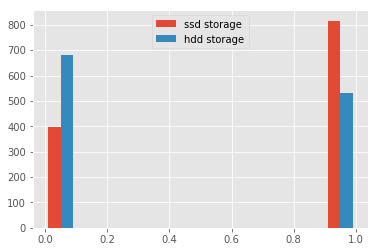

In [71]:
plt.hist([laptops_copy.storage_ssd, laptops_copy.storage_hdd], label=['ssd storage', 'hdd storage'])
plt.legend(loc='upper center')
plt.show()